In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/banknotes.csv')

In [3]:
# input features
x = df.drop('Class', axis =1)

# output features
y = df['Class']

##### Cross Validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [6]:
x_train.shape, x_test.shape

((1029, 4), (343, 4))

##### Build the model

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf_rf = RandomForestClassifier(random_state = 0, n_estimators = 10) # subsets of data is fed to 10 trees

In [14]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [15]:
y_pred = clf_rf.predict(x_test)

##### Evaluate the performance

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [18]:
accuracy_score(y_test, y_pred)

0.9941690962099126

In [20]:
print(confusion_matrix(y_test, y_pred)) # Compared to decision tree classifier, this accuracy increased by 1.5%

[[193   2]
 [  0 148]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [24]:
clf_rf.estimators_ # showing list of objects

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

##### Visualize the tree

In [25]:
from sklearn.tree import plot_tree

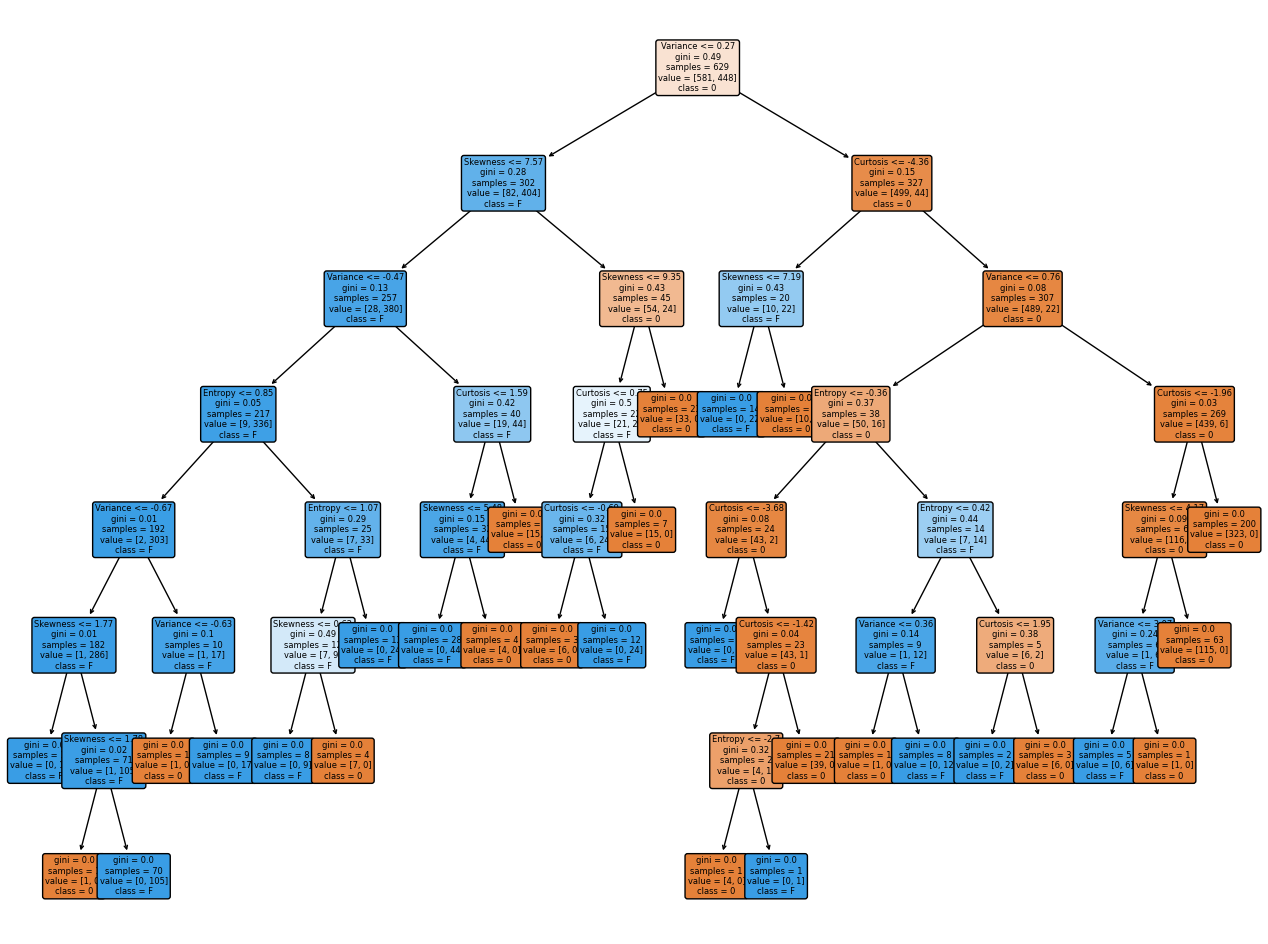

In [29]:
plt.figure(figsize=(16,12))
plot_tree(clf_rf.estimators_[9], fontsize = 6, feature_names = x.columns, filled = True, precision =2, class_names = ['0', 'F'], rounded = True); # can print any tree in index
plt.savefig('tree.png')

In [30]:
%%time
clf_rf.fit(x_train, y_train)

CPU times: total: 15.6 ms
Wall time: 20 ms


RandomForestClassifier(n_estimators=10, random_state=0)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf_tree = DecisionTreeClassifier(random_state=0)

In [33]:
%%time
clf_tree.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 4 ms


DecisionTreeClassifier(random_state=0)

In [34]:
import time

In [35]:
time.time()

1720681433.395884

In [36]:
time.asctime()

'Thu Jul 11 12:34:43 2024'

In [42]:
start = time.time()
print ('Hello World')
end = time.time()

Hello World


In [43]:
end - start

0.0

In [44]:
start = time.time()
clf_tree.fit(x_train, y_train)
end = time.time()
print('Decision tree:', end-start)

start = time.time()
clf_rf.predict(x_test)
end = time.time()
print ('Random Forest:', end - start)

Decision tree: 0.003000497817993164
Random Forest: 0.0019996166229248047
